In [346]:
#loading python libraries for data analysis
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
from IPython.display import display

In [347]:
#loading the dataset
data = pd.read_csv('Walmart_Store_sales.csv')
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [348]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [349]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [350]:
data.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [351]:
data['Day']   = pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year']  = pd.DatetimeIndex(data['Date']).year
data
# This block of code was contributed by amajety1 

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


### Q1: Which store has minimum and maximum sales?

In [407]:
# FURTHER ANALYSIS

total_sales_for_each_store       = data.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_for_each_store

# from this code we have sorted the stores in ascending order of total sum of weekly_sales
# stores 33 has had the leaast sales and store 20 has had the highest
# in the following code let's visualise that and later plot separate graphs for these two stores

Store
33    3.716022e+07
44    4.329309e+07
5     4.547569e+07
36    5.341221e+07
38    5.515963e+07
3     5.758674e+07
30    6.271689e+07
37    7.420274e+07
16    7.425243e+07
29    7.714155e+07
9     7.778922e+07
42    7.956575e+07
7     8.159828e+07
15    8.913368e+07
43    9.056544e+07
25    1.010612e+08
21    1.081179e+08
45    1.123953e+08
17    1.277821e+08
8     1.299512e+08
35    1.315207e+08
40    1.378703e+08
34    1.382498e+08
26    1.434164e+08
12    1.442872e+08
22    1.470756e+08
18    1.551147e+08
32    1.668192e+08
41    1.813419e+08
28    1.892637e+08
11    1.939628e+08
24    1.940160e+08
23    1.987506e+08
31    1.996139e+08
19    2.066349e+08
39    2.074455e+08
1     2.224028e+08
6     2.237561e+08
27    2.538559e+08
10    2.716177e+08
2     2.753824e+08
13    2.865177e+08
14    2.889999e+08
4     2.995440e+08
20    3.013978e+08
Name: Weekly_Sales, dtype: float64

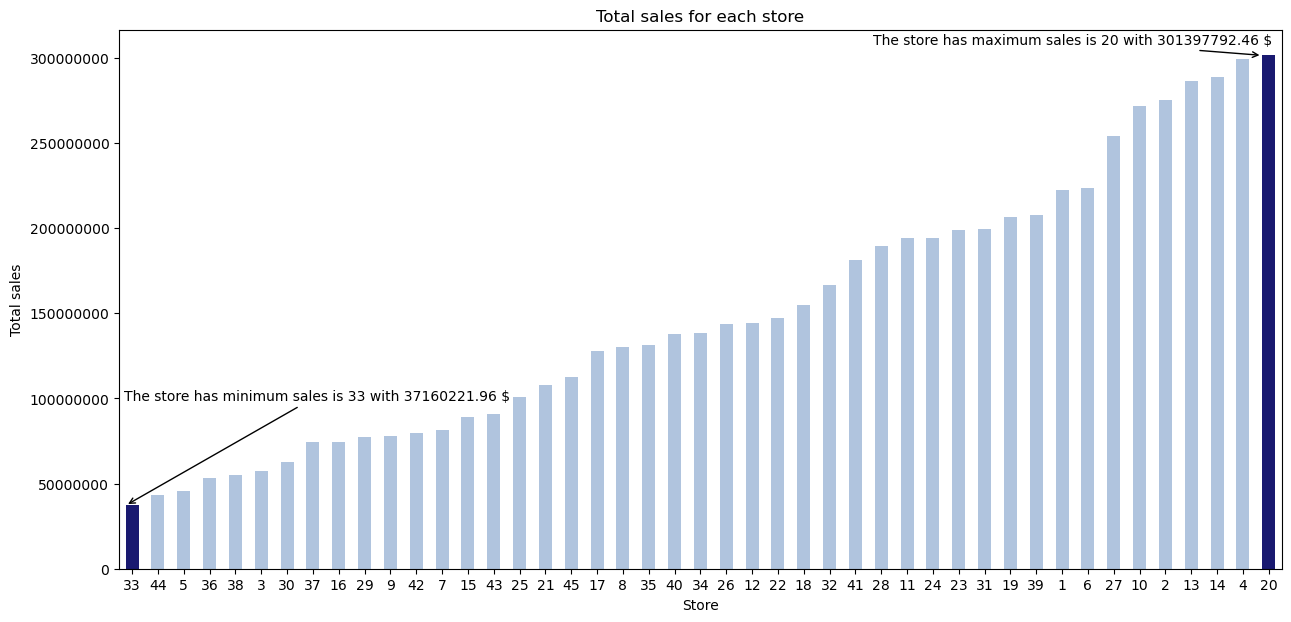

In [353]:
plt.figure(figsize=(15,7))

total_sales_for_each_store       = data.groupby('Store')['Weekly_Sales'].sum().sort_values()
total_sales_for_each_store_array = np.array(total_sales_for_each_store)

clrs = ['lightsteelblue' if((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'midnightblue' for x in total_sales_for_each_store_array]

ax = total_sales_for_each_store.plot(kind='bar',color=clrs);


# store have minimum sales
p = ax.patches[0]
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


#plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total sales');

### Store-wise Analysis of sales

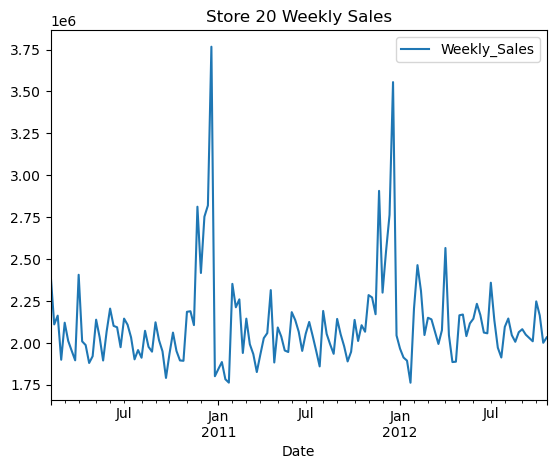

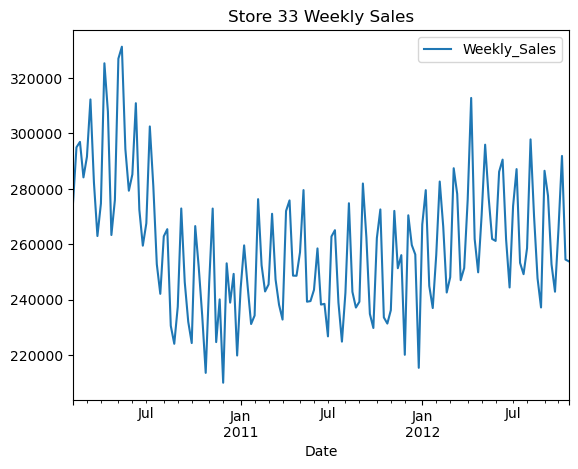

In [403]:
# FURTHER ANALYSIS

store_highest_sales = total_sales_for_each_store.idxmax()
store_lowest_sales = total_sales_for_each_store.idxmin()

# Plot the graphs for the store with the highest sales
store_highest_data = data[data['Store'] == store_highest_sales]
store_highest_data.plot(x='Date', y='Weekly_Sales', title=f'Store {store_highest_sales} Weekly Sales')
plt.show()

# Plot the graphs for the store with the lowest sales
store_lowest_data = data[data['Store'] == store_lowest_sales]
store_lowest_data.plot(x='Date', y='Weekly_Sales', title=f'Store {store_lowest_sales} Weekly Sales')
plt.show()

### Q2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, finding out the coefficient of mean to standard deviation?

In [354]:
# FURTHER ANALYSIS 

## Which store has maximum standard deviation
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has maximum standard deviation is 14 with 317570 $


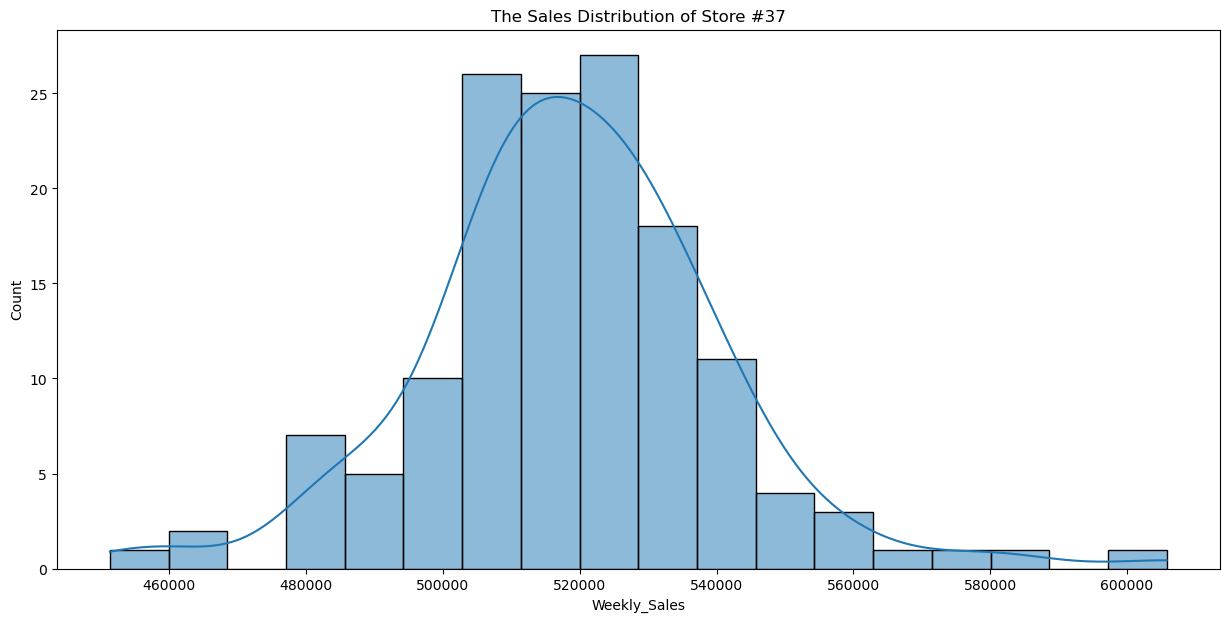

In [409]:
# FURTHER ANALYSIS

plt.figure(figsize=(15,7))
sns.histplot(data=data[data['Store'] == data_std.head(1).index[0]], x='Weekly_Sales', kde=True)
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));
plt.show()

In [356]:
# Which store has minimum standard deviation
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=True))
print("The store has minimum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))

The store has minimum standard deviation is 37 with 21837 $


In [359]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


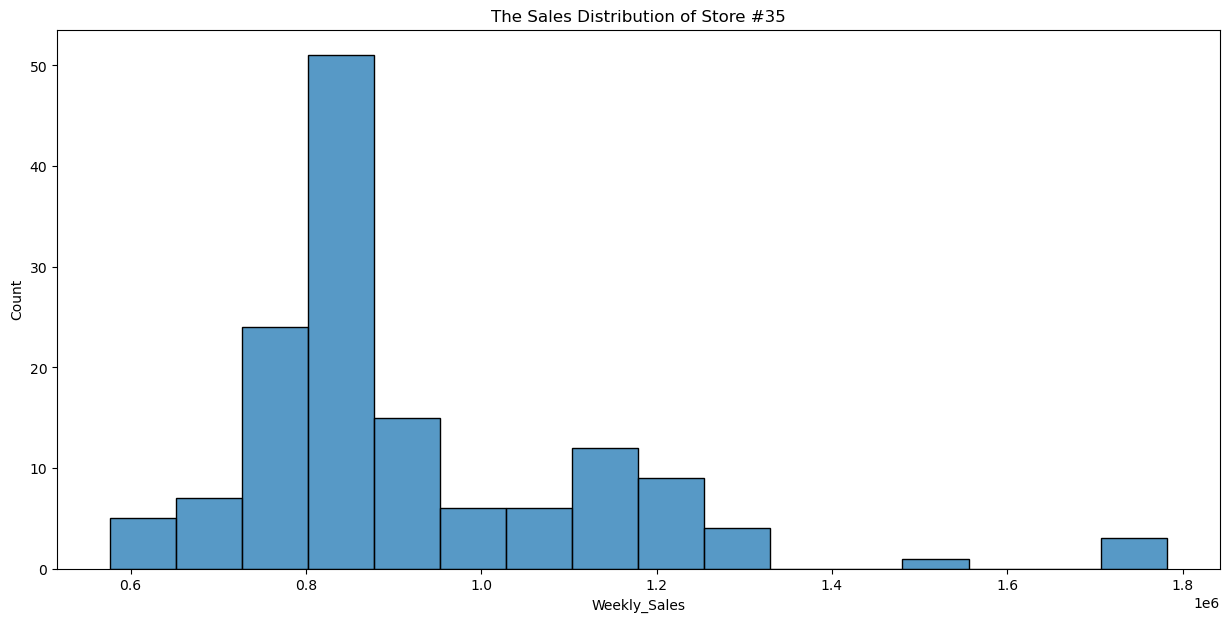

In [410]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.histplot(data[data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));

### Q3. Which store/s has good quarterly rate in Q3'2012?

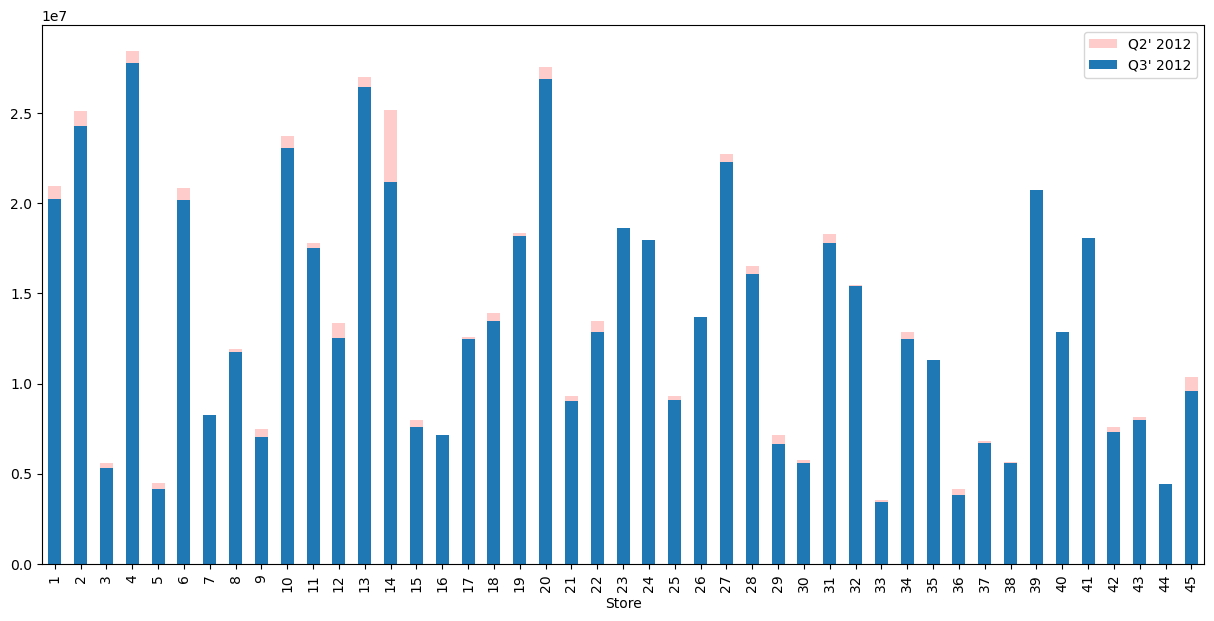

In [361]:
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
ax = Q2.plot(kind='bar', color='r', alpha=0.2, legend=True)
Q3.plot(kind='bar', ax=ax, legend=True)
plt.legend(["Q2' 2012", "Q3' 2012"]);

In [362]:
#  store/s has good quarterly growth rate in Q3’2012 - .sort_values(by='Weekly_Sales')
print('Store that has good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store that has good quarterly growth rate in Q3’2012 is Store 4 With 27796792.46 $


### Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together


**Holiday Events:**

- Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

- Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

- Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

- Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13


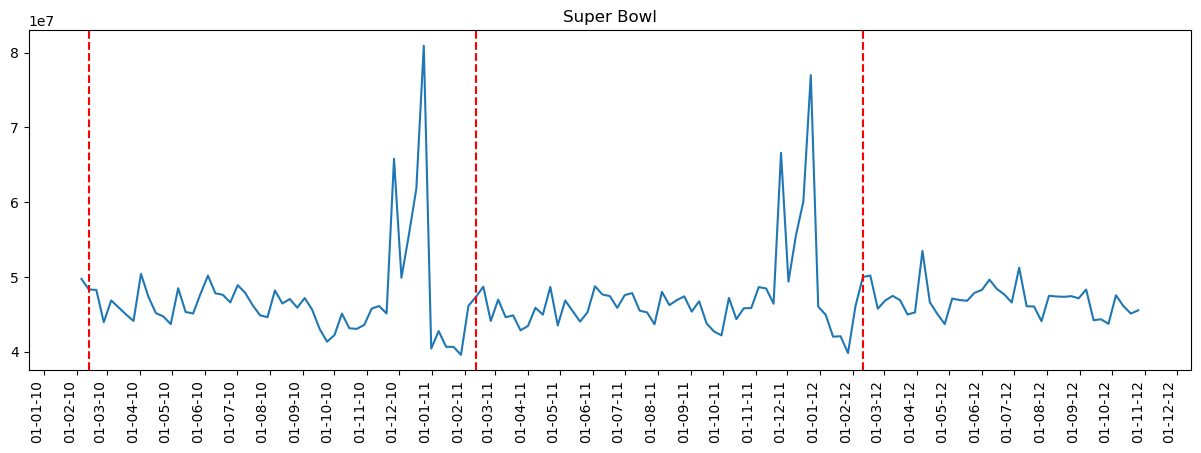

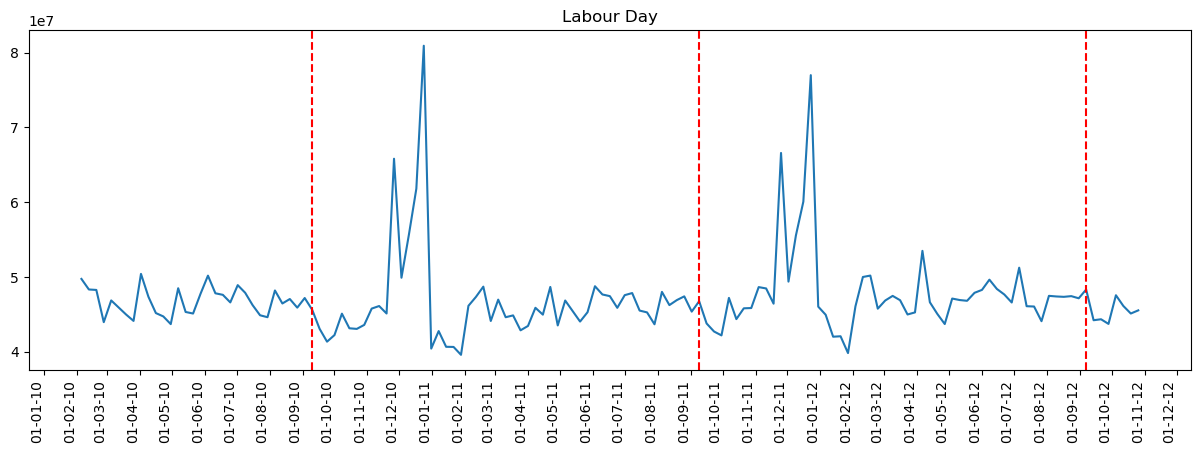

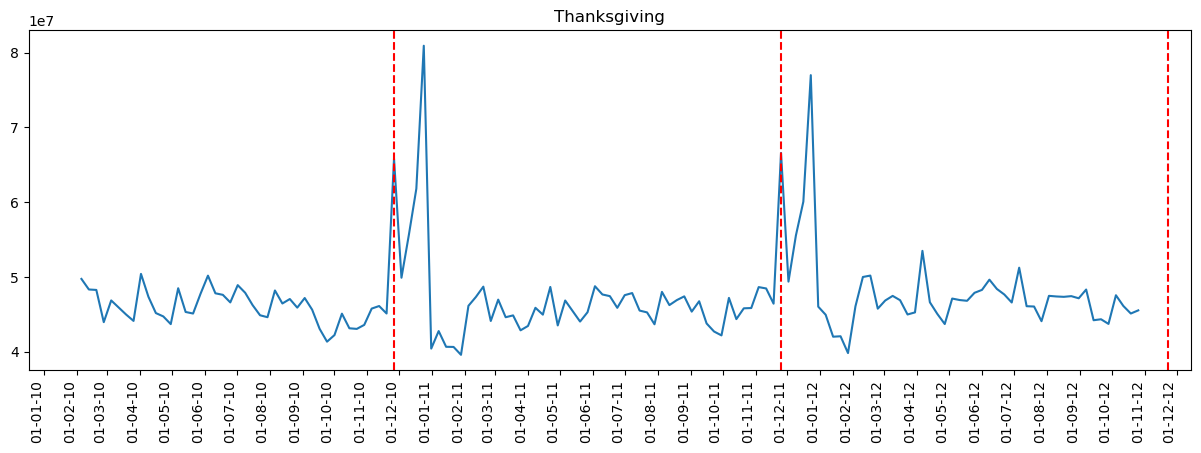

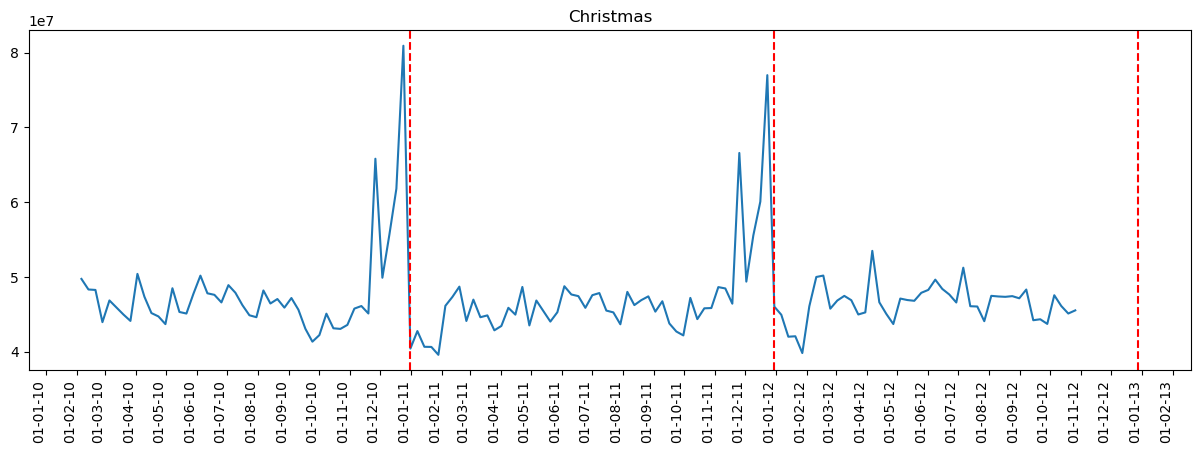

In [366]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


    
total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

Super_Bowl   = ['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day   = ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving = ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas    = ['31-12-2010', '30-12-2011', '28-12-2012']

plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')


### Sales increased during thanksgiving and decreased during christmas

In [379]:
Super_Bowl_1 =['2010-2-12', '2011-2-11', '2012-2-10']
data.loc[data.Date.isin(Super_Bowl_1)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742,11,2,2011
105,1,2012-02-10,1802477.43,1,48.02,3.409,220.265178,7.348,10,2,2012
144,2,2010-02-12,2137809.50,1,38.49,2.548,210.897994,8.324,12,2,2010
196,2,2011-02-11,2168041.61,1,33.19,3.022,212.592862,8.028,11,2,2011
...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-02-11,307486.73,1,30.83,3.034,127.859129,7.224,11,2,2011
6254,44,2012-02-10,325377.97,1,33.73,3.116,130.384903,5.774,10,2,2012
6293,45,2010-02-12,656988.64,1,27.73,2.773,181.982317,8.992,12,2,2010
6345,45,2011-02-11,766456.00,1,30.30,3.239,183.701613,8.549,11,2,2011


<Axes: title={'center': 'Yearly Sales in Christmas holiday'}, xlabel='Year'>

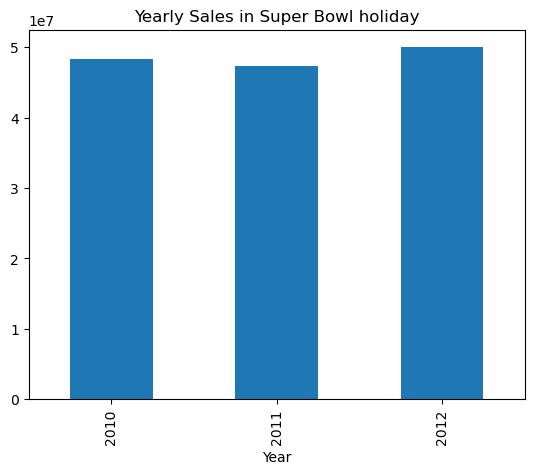

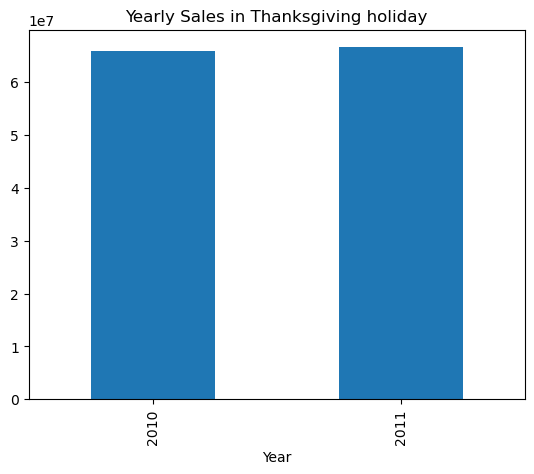

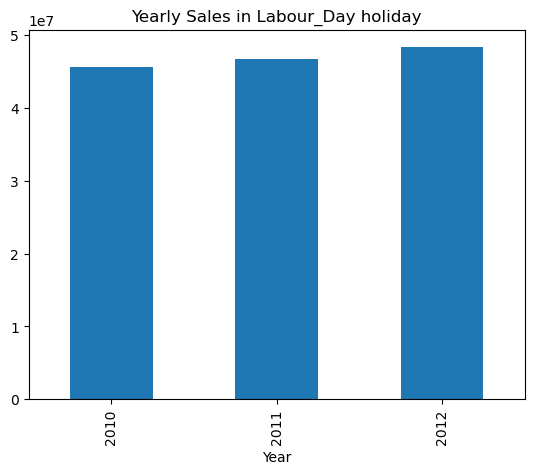

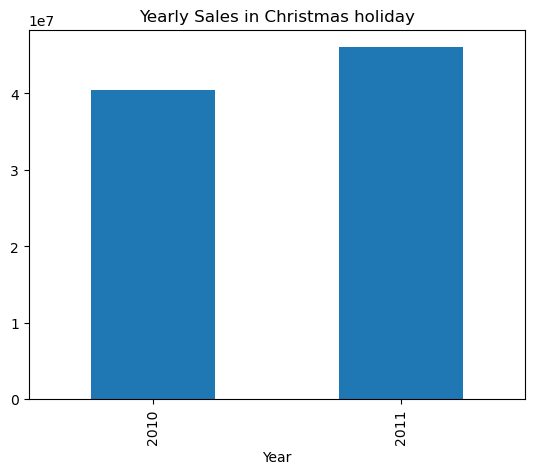

In [380]:
# Yearly Sales in holidays
Super_Bowl1 =['2010-2-12', '2011-2-11', '2012-2-10']
Labour_Day1 =  ['2010-9-10', '2011-9-9', '2012-9-7']
Thanksgiving1 =  ['2010-11-26', '2011-11-25', '2012-11-23']
Christmas1 = ['2010-12-31', '2011-12-30', '2012-12-28']

Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl1)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day1)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving1 = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving1)].groupby('Year')['Weekly_Sales'].sum())
Christmas1    = pd.DataFrame(data.loc[data.Date.isin(Christmas1)].groupby('Year')['Weekly_Sales'].sum())


Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour_Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')

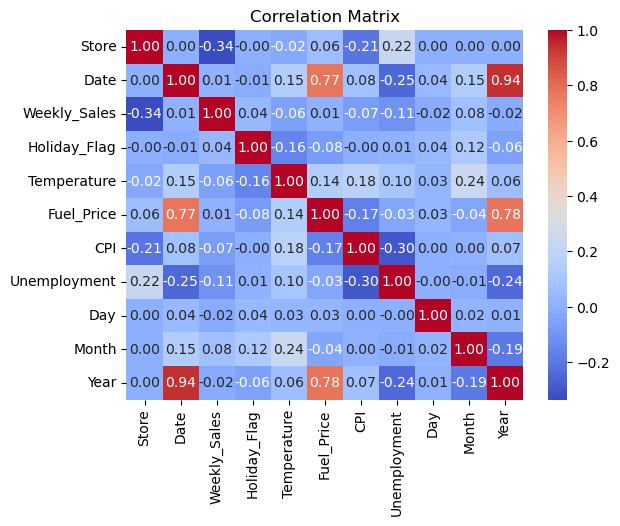

In [411]:
# FURTHER ANALYSIS 

correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
# most of the relations in this matrix dont make any sense 
# this code is here just for reference of the .heatmap() method"

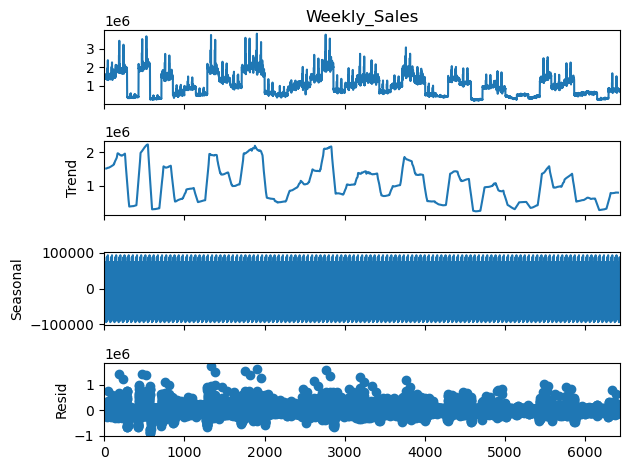

In [412]:
# FURTHER ANALYSIS 

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data['Weekly_Sales'], period=52)
decomposition.plot()
plt.show()

### Q5: Provide a monthly and semester view of sales in units and give insights

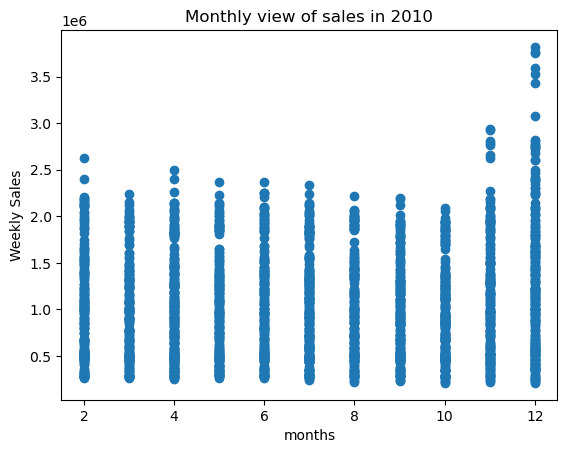

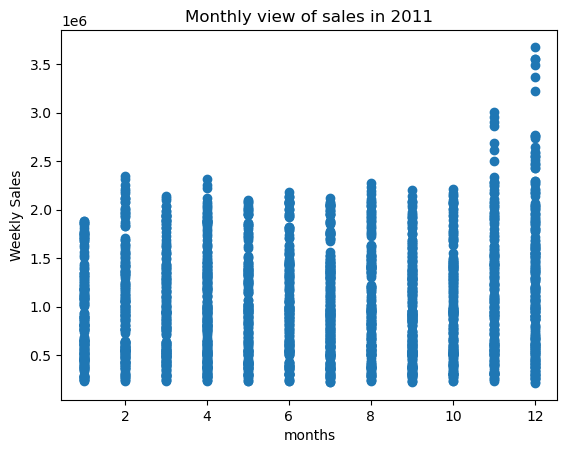

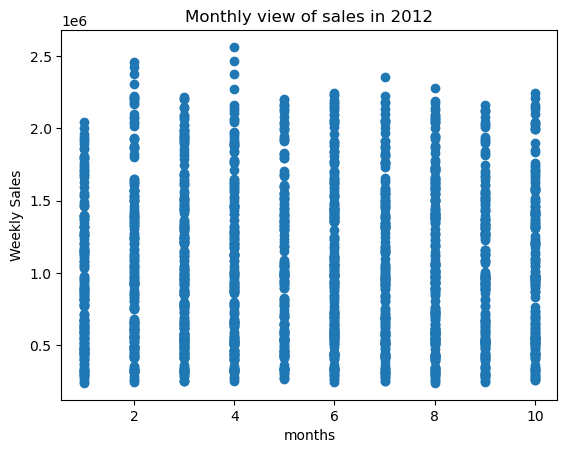

In [381]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show()

plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show()

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show()

Text(0.5, 1.0, 'Monthly view of sales')

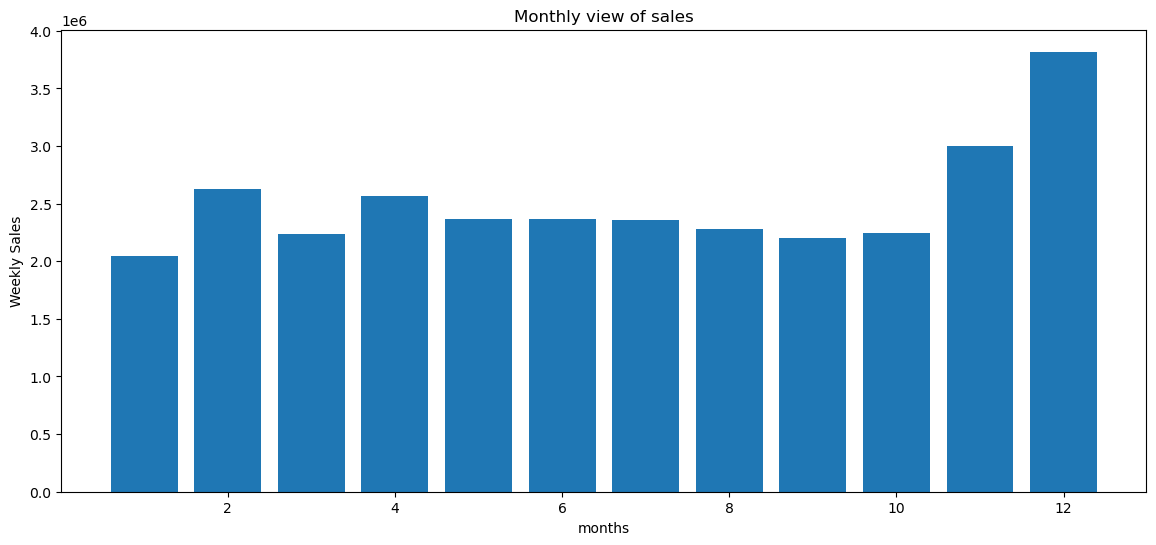

In [382]:
plt.figure(figsize=(14,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

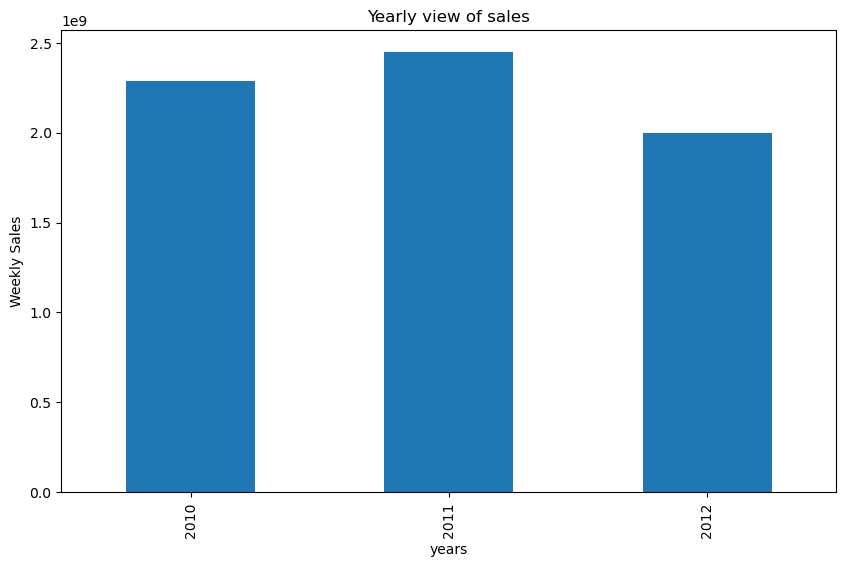

In [384]:
#yearly view of sales

plt.figure(figsize=(10,6))
data.groupby('Year')['Weekly_Sales'].sum().plot(kind = 'bar', legend = False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");


### Build prediction models to forecast demand (Modeling)


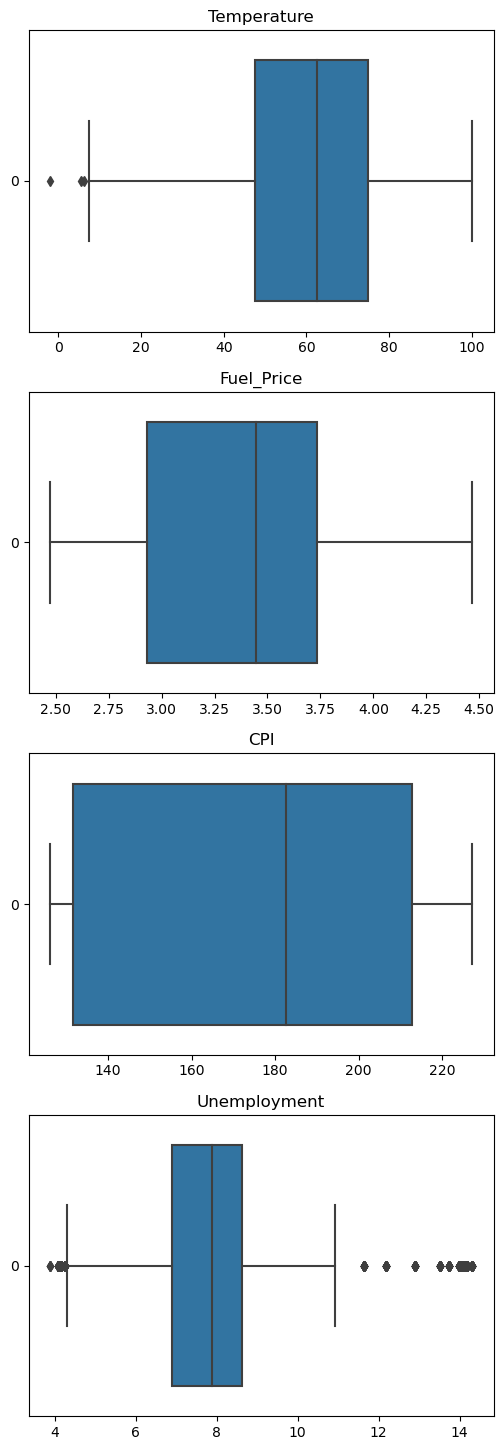

In [385]:
# find outliers 
fig, axs = plt.subplots(4,figsize=(6,18))
X = data[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot( data[column], ax=axs[i], orient='h')
    axs[i].set_title(column) 

In [386]:
data_new = data[(data['Unemployment']<10) & (data['Unemployment']>4.5) & (data['Temperature']>10)]
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [387]:
month_mapping = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April':4,
    'May':5,
    'June':6,
    'July':7,
    'August':8,
    'September':9,
    'October':10,
    'November':11,
    'December':12
}

#data_new.loc[:, 'Month'] = data_new['Month'].map(month_mapping)
data_new

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,28,9,2012
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,5,10,2012
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


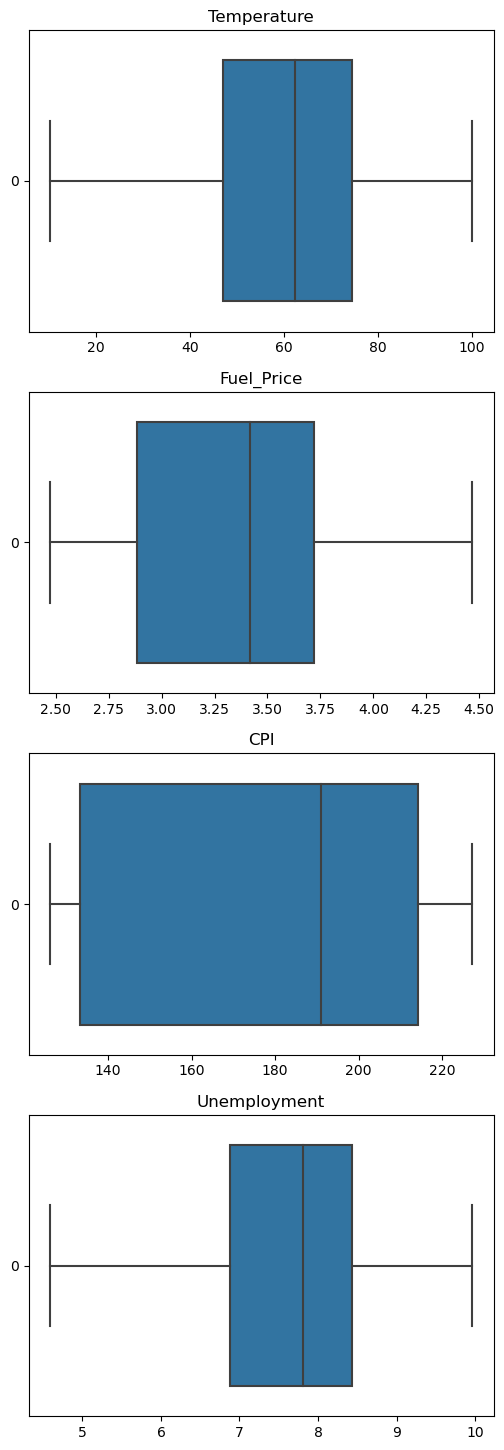

In [388]:
fig, axs = plt.subplots(4,figsize=(6,18))
X = data_new[['Temperature','Fuel_Price','CPI','Unemployment']]
for i,column in enumerate(X):
    sns.boxplot( data_new[column], ax=axs[i], orient='h')
    axs[i].set_title(column)     

### Build Model

In [389]:
# Import sklearn 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [390]:
# Select features and target 


X = data_new[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data_new['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


Linear Regression:

Accuracy: 12.972854685058788
Mean Absolute Error: 454345.43774701376
Mean Squared Error: 298988442550.43695
Root Mean Squared Error: 546798.3563896631


<Axes: ylabel='Weekly_Sales'>

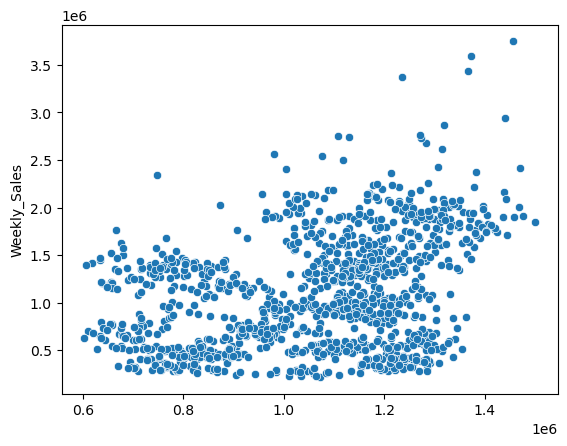

In [391]:
# Linear Regression model
print('Linear Regression:')
print()
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('Accuracy:',reg.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test)

Random Forest Regressor:

Accuracy: 94.53426249192323
Mean Absolute Error: 64294.69070062879
Mean Squared Error: 18707114373.86132
Root Mean Squared Error: 136773.95356522134


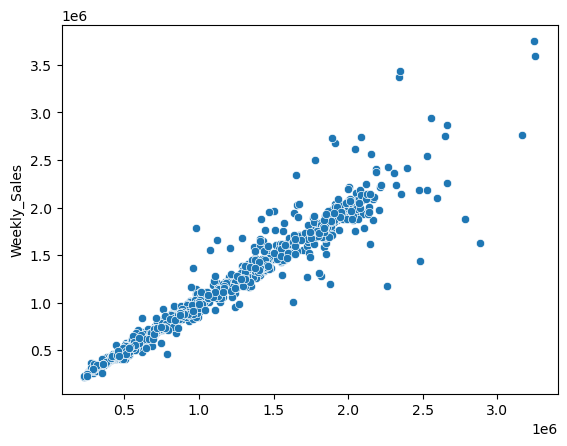

In [394]:
# Random Forest Regressor
print('Random Forest Regressor:')
print()
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15,n_jobs=5)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)
print('Accuracy:',rfr.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


sns.scatterplot(x=y_pred, y=y_test);


###                                                                             THE END